In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.1 MB/s eta 0:00:00


In [1]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 10.7 MB/s eta 0:00:00


In [ ]:
import nltk
import emoji
import contractions
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# This line reads the CSV file and loads it into the variable `IMDB_movies` as a DataFrame.
IMDB_movies = pd.read_csv('/content/IMDB Dataset.csv')

# Displaying the first five rows of the DataFrame to get an overview of the data.
IMDB_movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# DATA PREPROCESSING AND CLEANING

In [ ]:
# Checking the total of missing values in each column of the DataFrame.
# The `isnull()` function returns a DataFrame of the same shape with boolean values indicating missing data.
# The `sum()` function then calculates the total number of missing values for each column

IMDB_movies.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
# The `info()` function provides detailed information such as the number of non-null entries,
# data types of each column, and memory usage of the IMDB movies DataFrame.
IMDB_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# Function to check if a string contains emoji
def contains_emoji(text):
  """
    Check if a given string contains any emoji characters.

    Args:
        text (str): The input string to check for emojis.

    Returns:
        bool: True if the string contains at least one emoji, False otherwise.
    """
  return any(emoji.is_emoji(char) for char in text)


# Apply the `contains_emoji` function to the 'review' column of the IMDB_movies DataFrame.
# This creates a new column 'has_emoji' with boolean values indicating the presence of emojis in each review.
IMDB_movies['has_emoji'] = IMDB_movies['review'].apply(contains_emoji)

# Filter and display the reviews that contain emojis.
# The `emoji_reviews` DataFrame only includes rows where 'has_emoji' is True.
emoji_reviews = IMDB_movies[IMDB_movies['has_emoji']]
print(emoji_reviews[['review']])


                                                  review
13735  I checked this movie out based on a favorable ...
21141  "In April 1946, the University of Chicago agre...
22728  That's the sound of Stan and Ollie spinning in...
36507  Klatret©ªsen(Catch That Girl) is really great ...
46515  I chuckled a few times during this movie. I la...


In [ ]:
# Function to check for numbers
def has_numbers(text):
  """
    Check if a given string contains any numerical digits.

    Args:
        text (str): The input string to check for numerical digits.

    Returns:
        bool: True if the string contains one or more numerical digits, False otherwise.
    """
  return bool(re.search(r'\d+', text))

# Apply the `has_numbers` function to the 'review' column of the IMDB_movies DataFrame.
# This creates a new column 'has_numbers' with boolean values indicating the presence of numbers in each review.
IMDB_movies['has_numbers'] = IMDB_movies['review'].apply(has_numbers)

# Filter and display the reviews that contain numbers.
# The `reviews_with_numbers` DataFrame only includes rows where 'has_numbers' is True.
reviews_with_numbers = IMDB_movies[IMDB_movies['has_numbers']]
print(reviews_with_numbers[['review']])


                                                  review
0      One of the other reviewers has mentioned that ...
2      I thought this was a wonderful way to spend ti...
3      Basically there's a family where a little boy ...
5      Probably my all-time favorite movie, a story o...
6      I sure would like to see a resurrection of a u...
...                                                  ...
49990  Lame, lame, lame!!! A 90-minute cringe-fest th...
49993  Robert Colomb has two full-time jobs. He's kno...
49994  This is your typical junk comedy.<br /><br />T...
49995  I thought this movie did a down right good job...
49998  I'm going to have to disagree with the previou...

[28005 rows x 1 columns]


In [ ]:
# Function to check for extra spaces
def has_extra_spaces(text):
  """
    Check if a given string contains any extra spaces.

    Args:
        text (str): The input string to check for extra spaces.

    Returns:
        bool: True if the string contains two or more consecutive spaces, False otherwise.
    """
  return bool(re.search(r'\s{2,}', text))

# Apply the `has_extra_spaces` function to the 'review' column of the IMDB_movies DataFrame.
# This creates a new column 'has_extra_spaces' with boolean values indicating the presence of extra spaces in each review.
IMDB_movies['has_extra_spaces'] = IMDB_movies['review'].apply(has_extra_spaces)

# Filter and display the reviews that contain extra spaces.
# The `extra_space_reviews` DataFrame only includes rows where 'has_extra_spaces' is True.
extra_space_reviews = IMDB_movies[IMDB_movies['has_extra_spaces']]
print(extra_space_reviews[['review']])


                                                  review
252    Insignificant and low-brained (haha!) 80's hor...
693    The year 2005 saw no fewer than 3 filmed produ...
1029   Shameless Screen Entertainment is a relatively...
1156   De Palma's technique had hit its high maturity...
1258   I do not like Himesh Reshamiya. I do not like ...
...                                                  ...
49286  Following a roughly 7 year rocky road on NBC, ...
49363  Wow, I swear this has never happened to me bef...
49382  1st watched 2/18/2007 - 4 out of 10(Dir-Leon L...
49595  I am not so much like Love Sick as I image. Fi...
49690  Hmm I agree with the reviewer who said that "...

[425 rows x 1 columns]


In [ ]:
# Download necessary NLTK resources for text processing.

# The 'stopwords' corpus contains a list of common stop words (e.g., 'the', 'is', 'in'),
# which can be removed from text to reduce noise and focus on meaningful words.
nltk.download('stopwords')

# The 'wordnet' lexical database is used for various text-processing operations,
# such as word synonyms, antonyms, and lemmatization.
nltk.download('wordnet')

# The 'punkt' tokenizer allows for sentence segmentation and word tokenization,
# enabling splitting text into sentences and sentences into words
nltk.download('punkt')

# The 'averaged_perceptron_tagger' is a part-of-speech (POS) tagger,
# which assigns POS tags (like noun, verb, adjective) to words in a sentence,
# providing syntactic information for text processing.
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Create a set of English stop words using the NLTK stopwords corpus.
stop_words = set(stopwords.words('english'))

In [ ]:
def get_wordnet_pos(treebank_tag):
  """
    Convert NLTK POS tag to a WordNet POS tag.

    This function maps the POS tags produced by NLTK (Treebank-style tags) to the format
    expected by the WordNet lemmatizer. WordNet uses a different tagging system for parts of speech:
    - 'a' for adjectives
    - 'v' for verbs
    - 'n' for nouns
    - 'r' for adverbs

    Args:
        treebank_tag (str): The POS tag generated by NLTK's `pos_tag` function, typically a single-character prefix
                            representing the part of speech (e.g., 'J' for adjective, 'V' for verb, etc.).

    Returns:
        str: A single character representing the WordNet POS tag ('a', 'v', 'n', 'r'), or None if no mapping is found.
    """
  if treebank_tag.startswith('J'):
      return 'a'  # adjective
  elif treebank_tag.startswith('V'):
      return 'v'  # verb
  elif treebank_tag.startswith('N'):
      return 'n'  # noun
  elif treebank_tag.startswith('R'):
      return 'r'  # adverb
  else:
      return None  # no mapping  # Default to noun

In [ ]:
def cleaning_process(text):
  """
    Clean and preprocess text data for Natural Language Processing (NLP) tasks.

    This function takes a text input and performs the following preprocessing steps:
    1. Fixes contractions (e.g., "don't" to "do not").
    2. Converts text to lowercase.
    3. Removes numbers.
    4. Removes URLs (web addresses).
    5. Removes HTML tags.
    6. Converts emojis to their text representation (e.g., "😊" to ":smile:").
    7. Removes punctuation.
    8. Removes extra whitespaces.
    9. Tokenizes text into individual words.
    10. Applies Part-of-Speech (POS) tagging to each token.
    11. Lemmatizes words based on their POS tag.
    12. Removes stopwords (e.g., "the", "and", "is").

    Args:
        text (str): The input text string to be cleaned and processed.

    Returns:
        list: A list of cleaned and lemmatized words (tokens) after applying all preprocessing steps.
    """

  # Step 1: Fix contractions
  text = contractions.fix(text)

  # Step 2: Convert text to lowercase
  #text= re.sub('[^a-zA-Z]',' ',text)
  text= text.lower()

  # Step 3: Remove numbers
  text = re.sub(r'\d+', '', text)

  # Step 4: Remove URLs
  text= re.sub(r'http\S+|www\S+', '', text)

  # Step 5: Remove HTML tags
  text= re.sub(r'<.*?>', '', text)

  # Step 6: Convert emoji to text
  text = emoji.demojize(text)

  # Step 7: Remove punctuations
  #text= ''.join([punc for punc in text if punc not in string.punctuation])
  text = re.sub(r'[^\w\s]', ' ', text)

  # Step 8: Remove extra whitespaces
  text= re.sub(r'\s+', ' ', text).strip()

  # Step 9: tokenise
  tokens= word_tokenize(text)

  # Step 10: Get POS tags for tokens
  pos_tags = pos_tag(tokens)

  # Step 11: lemmatisation
  lemmatizer= WordNetLemmatizer()
  #lemmas= [lemmatizer.lemmatize(word) for word in tokens]
  #lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]

  lemmas = []
  for token, tag in pos_tags:
        wordnet_pos = get_wordnet_pos(tag) or 'n'  # Default to noun
        lemmatized_word = lemmatizer.lemmatize(token, pos=wordnet_pos)
        lemmas.append(lemmatized_word)

  # Step 12: Remove stopwords
  cleaned_text = [lemma for lemma in lemmas if lemma not in stop_words]

  return cleaned_text



In [ ]:
# Apply the cleaning_process function to the 'review' column of the IMDB_movies DataFrame.
# This operation cleans and preprocesses the text data in the 'review' column, including
# removing unwanted characters, converting emojis to text, lemmatizing words, and filtering out
# stopwords. The cleaned reviews are stored in a new column named 'cleaned_reviews'.

IMDB_movies['cleaned_reviews'] = IMDB_movies['review'].apply(cleaning_process)

In [ ]:
# Retrieve the first review from the 'review' column of the IMDB_movies DataFrame
# using the iloc indexer and print its content.
# This operation provides a way to examine the original review text before any
# cleaning or preprocessing has been applied, allowing for comparison with cleaned reviews.

first_review = IMDB_movies['review'].iloc[0]
print(first_review)

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [ ]:
# Retrieve the first cleaned review from the 'cleaned_reviews' column of the IMDB_movies DataFrame
# using the iloc indexer and print its content.
# This operation allows for a comparison between the original review and the cleaned review,
# enabling an assessment of the effectiveness of the cleaning process.

first_reviews = IMDB_movies['cleaned_reviews'].iloc[0]
print(first_reviews)

['one', 'reviewer', 'mention', 'watch', 'oz', 'episode', 'hook', 'right', 'exactly', 'happen', 'first', 'thing', 'strike', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'call', 'oz', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'city', 'home', 'many', 'aryan', 'muslim', 'gangstas', 'latinos', 'christian', 'italian', 'irish', 'scuffles', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'would', 'dare', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romance', 'oz', 'mess', 'ar

In [ ]:
# Display the first five entries of the 'cleaned_reviews' column
IMDB_movies['cleaned_reviews'].head(100)

,cleaned_reviews
0,"[one, reviewer, mention, watch, oz, episode, h..."
1,"[wonderful, little, production, filming, techn..."
2,"[think, wonderful, way, spend, time, hot, summ..."
3,"[basically, family, little, boy, jake, think, ..."
4,"[petter, mattei, love, time, money, visually, ..."
...,...
95,"[daniel, day, lewis, versatile, actor, alive, ..."
96,"[guess, would, originally, go, least, two, par..."
97,"[well, like, watch, bad, horror, b, movie, thi..."
98,"[bad, movie, ever, see, well, bad, probably, e..."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# If 'cleaned_reviews' contains lists of tokens, join them back into strings
IMDB_movies['cleaned_reviews'] = IMDB_movies['cleaned_reviews'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Transform text data (reviews) into numerical features using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(IMDB_movies['cleaned_reviews'])  # Reviews as input (X)

# Target variable (y) is the sentiment column
y = IMDB_movies['sentiment']  # Sentiments (positive/negative) as target (y)

# Step 2: Encode the target variable (sentiment) if not numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert 'positive' to 1 and 'negative' to 0 (or vice versa)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Retrieve the 'cleaned_reviews' column from the IMDB_movies DataFrame
IMDB_movies['cleaned_reviews']

,cleaned_reviews
0,one reviewer mention watch oz episode hook rig...
1,wonderful little production filming technique ...
2,think wonderful way spend time hot summer week...
3,basically family little boy jake think zombie ...
4,petter mattei love time money visually stunnin...
...,...
49995,think movie right good job creative original f...
49996,bad plot bad dialogue bad act idiotic direct a...
49997,catholic taught parochial elementary school nu...
49998,go disagree previous comment side maltin one s...


# SENTIMENT DISTRIBUTION


This script visualizes the distribution of the target variable 'sentiment'
in the IMDB_movies dataset using a count plot. The visualization helps to
check if the target variable is balanced, which is crucial in deciding whether
to apply resampling techniques, such as oversampling or undersampling.

## Key Steps:
1. **Data Visualization**: A count plot is used to display the number of occurrences of each sentiment class.
2. **Balance Check**: The plot helps to determine if the sentiment classes are balanced or imbalanced.
   - If the classes are imbalanced, it indicates that resampling techniques might be needed.

## Requirements:
- The code snippet uses the seaborn (`sns`) and matplotlib (`plt`) libraries for visualization.
- Ensure that the dataset (`IMDB_movies`) contains a column named 'sentiment' for this script to work correctly.

## Visualization:
- The count plot displays the frequency of each sentiment class (e.g., positive, negative).
- A balanced target variable would have approximately equal counts for each sentiment.
- An imbalanced target variable would show a significant difference in counts between sentiment classes.

## Output:
- A bar plot titled 'Balance of Target Variable' showing the distribution of sentiment classes in the dataset.





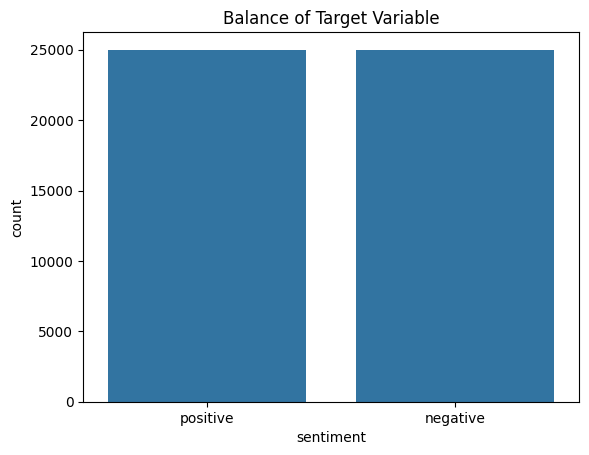

In [ ]:
# Balance of target variable to check if i need to apply resampling techniques
sns.countplot(x='sentiment', data=IMDB_movies)
plt.title('Balance of Target Variable')
plt.show()


### Visualization:
- A bar plot titled 'Balance of Target Variable' showing the distribution of sentiment classes in the dataset.
- Each bar is annotated with the count of its corresponding sentiment class.

### Output:
- A count plot showing the balance of the 'sentiment' variable with annotated counts.
- This visualization helps identify if the dataset has class imbalance.

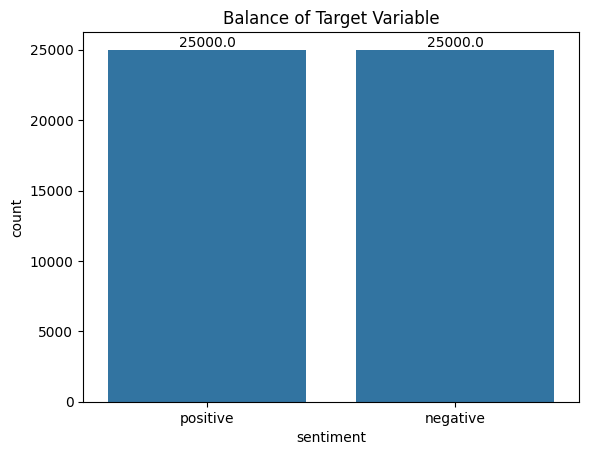

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the balance of the target variable 'sentiment' in the IMDB_movies dataset
sns.countplot(x='sentiment', data=IMDB_movies)

# Add a title to the plot
plt.title('Balance of Target Variable')

# Annotate each bar in the count plot with its corresponding count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',  # Text annotation: count of samples
                       (p.get_x() + p.get_width() / 2, p.get_height()),  # Position annotation
                       ha='center',  # Horizontal alignment to center
                       va='bottom',  # Vertical alignment at the bottom of the bar
                       color='black')  # Text color

# Display the plot
plt.show()

# APPLYING DIFFERENT ALGORITHM MODELS
## USING NAIVE BAYES ALGORITHM
This script applies the Multinomial Naive Bayes algorithm to the IMDB sentiment classification dataset.
The workflow involves training the model on the training data, making predictions on the test data,
and evaluating its performance using accuracy score and classification report.

### Steps:
1. **Model Initialization**:
   - A Multinomial Naive Bayes classifier (`MultinomialNB`) is instantiated.
2. **Model Training**:
   - The model is trained using the training data (`X_train` and `y_train`).
3. **Prediction**:
   - Predictions are made on the test data (`X_test`).
4. **Evaluation**:
   - The accuracy score and classification report are displayed to assess model performance.

### Requirements:
- This code uses `MultinomialNB` from `sklearn.naive_bayes` for the Naive Bayes classifier.
- `accuracy_score` and `classification_report` from `sklearn.metrics` are used for evaluation metrics.
- Ensure that `X_train`, `X_test`, `y_train`, and `y_test` are defined and contain preprocessed training and testing data.

### Explanation:
- Naive Bayes is a probabilistic algorithm commonly used for text classification tasks like sentiment analysis.
- The `MultinomialNB` variant is suitable for text classification where features are word frequencies or counts.
- This code prints the accuracy score to measure the overall correctness of the model and displays a detailed classification report for more insights.

### Output:
- **Naive Bayes Accuracy**: The proportion of correct predictions made by the model.
- **Classification Report**: Precision, recall, f1-score, and support for each class in the target variable.



In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Applying Naive Bayes Algorithm
nb_IMDB = MultinomialNB()  # Step 1: Instantiate the Multinomial Naive Bayes classifier

# Train the model on the training data
nb_IMDB.fit(X_train, y_train)  # Step 2: Fit the model with training data

# Make predictions on the test data
y_pred_nb = nb_IMDB.predict(X_test)  # Step 3: Predict sentiment classes for test data

# Evaluate the model performance using accuracy score and classification report
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}")  # Step 4: Print accuracy score
print(classification_report(y_test, y_pred_nb))  # Step 4: Print detailed classification report


Naive Bayes Accuracy: 0.8362
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4961
           1       0.83      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## USING LOGISTIC REGRESSION
This script applies the Logistic Regression algorithm to the IMDB sentiment classification dataset.
The workflow includes training the Logistic Regression model on the training data, making predictions
on the test data, and evaluating its performance using accuracy score and classification report.

### Steps:
1. **Model Initialization**:
   - A Logistic Regression classifier (`LogisticRegression`) is instantiated.
2. **Model Training**:
   - The model is trained using the training data (`X_train` and `y_train`).
3. **Prediction**:
   - Predictions are made on the test data (`X_test`).
4. **Evaluation**:
   - The accuracy score and classification report are printed to assess model performance.

### Requirements:
- This code uses `LogisticRegression` from `sklearn.linear_model` for the Logistic Regression classifier.
- `accuracy_score` and `classification_report` from `sklearn.metrics` are used for evaluation metrics.
- Ensure that `X_train`, `X_test`, `y_train`, and `y_test` are defined and contain preprocessed training and testing data.

### Explanation:
- Logistic Regression is a linear model commonly used for binary and multiclass classification tasks, including text-based sentiment analysis.
- It works by estimating probabilities using a logistic function and classifies data based on a decision boundary.
- This code prints the accuracy score to measure the overall correctness of the model and displays a detailed classification report for more insights.

### Output:
- **Logistic Regression Accuracy**: The proportion of correct predictions made by the model.
- **Classification Report**: Precision, recall, f1-score, and support for each class in the target variable.


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Applying Logistic Regression Algorithm
LR_IMDB = LogisticRegression()  # Step 1: Instantiate the Logistic Regression classifier

# Train the model on the training data
LR_IMDB.fit(X_train, y_train)  # Step 2: Fit the model with training data

# Make predictions on the test data
y_pred_LR = LR_IMDB.predict(X_test)  # Step 3: Predict sentiment classes for test data

# Evaluate the model performance using accuracy score and classification report
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_LR)}")  # Step 4: Print accuracy score
print(classification_report(y_test, y_pred_LR))  # Step 4: Print detailed classification report

Logistic Regression accuracy: 0.8658
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## USING SUPPORT VECTOR MACHINE
This script applies the Support Vector Machine (SVM) algorithm to the IMDB sentiment classification dataset.
It involves training the SVM model on the training data, making predictions on the test data, and evaluating
its performance using accuracy score and a detailed classification report.

### Steps:
1. **Model Initialization**:
   - A Support Vector Classifier (`SVC`) is instantiated with a linear kernel.
2. **Model Training**:
   - The model is trained using the training data (`X_train` and `y_train`).
3. **Prediction**:
   - Predictions are made on the test data (`X_test`).
4. **Evaluation**:
   - The accuracy score and classification report are printed to assess model performance.

### Requirements:
- This code uses `SVC` from `sklearn.svm` for the Support Vector Classifier.
- `accuracy_score` and `classification_report` from `sklearn.metrics` are used for evaluation metrics.
- Ensure that `X_train`, `X_test`, `y_train`, and `y_test` are defined and contain preprocessed training and testing data.
- `label_encoder.classes_` should be defined if you're using a LabelEncoder to encode target classes.

### Explanation:
- Support Vector Machine is a powerful classification algorithm that aims to find a hyperplane that best separates the data into different classes.
- In this script, the `SVC` is used with a linear kernel, which is suitable for linearly separable data or when dealing with high-dimensional spaces.
- The `classification_report` provides precision, recall, f1-score, and support for each class, offering insights into how well the model is performing.

### Output:
- **SVM Accuracy**: The proportion of correct predictions made by the model.
- **Classification Report**: Precision, recall, f1-score, and support for each class in the target variable.



In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Applying Support Vector Machine (SVM) Algorithm
SVM_IMDB = SVC(kernel='linear')  # Step 1: Instantiate the SVM classifier with a linear kernel

# Train the model on the training data
SVM_IMDB.fit(X_train, y_train)  # Step 2: Fit the model with training data

# Make predictions on the test data
y_pred_SVM = SVM_IMDB.predict(X_test)  # Step 3: Predict sentiment classes for test data

# Evaluate the model performance using accuracy score and classification report
print(f"Support Vector Machine Accuracy: {accuracy_score(y_test, y_pred_SVM)}")  # Step 4: Print accuracy score
print(classification_report(y_test, y_pred_SVM, target_names=label_encoder.classes_))  # Step 4: Print detailed classification report

Support Vector machine: 0.8648
              precision    recall  f1-score   support

    negative       0.88      0.85      0.86      4961
    positive       0.85      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



## USING LINEAR SUPPORT VECTOR CLASSIFIER
This script applies the Linear Support Vector Classifier (LinearSVC) algorithm to the IMDB sentiment classification dataset.
The workflow includes training the LinearSVC model on the training data, making predictions on the test data, and evaluating
its performance using accuracy score and a detailed classification report.

### Steps:
1. **Model Initialization**:
   - A `LinearSVC` classifier is instantiated with specified parameters for `max_iter` and `random_state`.
2. **Model Training**:
   - The model is trained using the training data (`X_train` and `y_train`).
3. **Prediction**:
   - Predictions are made on the test data (`X_test`).
4. **Evaluation**:
   - The accuracy score and classification report are printed to assess model performance.

### Requirements:
- This code uses `LinearSVC` from `sklearn.svm` for the Linear Support Vector Classifier.
- `accuracy_score` and `classification_report` from `sklearn.metrics` are used for evaluation metrics.
- Ensure that `X_train`, `X_test`, `y_train`, and `y_test` are defined and contain preprocessed training and testing data.
- `label_encoder.classes_` should be defined if you're using a LabelEncoder to encode target classes.

### Explanation:
- `LinearSVC` is a linear Support Vector Classifier optimized for handling linear decision boundaries. It is often faster and more efficient than `SVC(kernel='linear')` for larger datasets.
- This script uses a `max_iter` parameter to specify the maximum number of iterations for convergence, and a `random_state` for reproducibility.
- The `classification_report` provides precision, recall, f1-score, and support for each class, offering insights into the model’s performance.

### Output:
- **LinearSVC Accuracy**: The proportion of correct predictions made by the model.
- **Classification Report**: Precision, recall, f1-score, and support for each class in the target variable.



In [ ]:
# Import necessary libraries
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Applying Linear Support Vector Classifier (LinearSVC)
LinearSVC_IMDB = LinearSVC(max_iter=1000, random_state=42)  # Step 1: Instantiate the LinearSVC with max_iter and random_state

# Train the model on the training data
LinearSVC_IMDB.fit(X_train, y_train)  # Step 2: Fit the model with training data

# Make predictions on the test data
y_pred_LinearSVC = LinearSVC_IMDB.predict(X_test)  # Step 3: Predict sentiment classes for test data

# Evaluate the model performance using accuracy score and classification report
print(f"LinearSVC Accuracy: {accuracy_score(y_test, y_pred_LinearSVC)}")  # Step 4: Print accuracy score
print(classification_report(y_test, y_pred_LinearSVC, target_names=label_encoder.classes_))  # Step 4: Print detailed classification report

LinearSVC: 0.8674
              precision    recall  f1-score   support

    negative       0.88      0.85      0.86      4961
    positive       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## USING RANDOM FOREST ALGORITHM
This script applies the Random Forest algorithm to the IMDB sentiment classification dataset.
The workflow includes training the Random Forest model on the training data, making predictions on the test data,
and evaluating its performance using accuracy score and a detailed classification report.

### Steps:
1. **Model Initialization**:
   - A `RandomForestClassifier` is instantiated with a specified number of decision trees (`n_estimators`) and a `random_state` for reproducibility.
2. **Model Training**:
   - The model is trained using the training data (`X_train` and `y_train`).
3. **Prediction**:
   - Predictions are made on the test data (`X_test`).
4. **Evaluation**:
   - The accuracy score and classification report are printed to assess model performance.

### Requirements:
- This code uses `RandomForestClassifier` from `sklearn.ensemble` for the Random Forest algorithm.
- `accuracy_score` and `classification_report` from `sklearn.metrics` are used for evaluation metrics.
- Ensure that `X_train`, `X_test`, `y_train`, and `y_test` are defined and contain preprocessed training and testing data.

### Explanation:
- `RandomForestClassifier` is an ensemble learning method that creates multiple decision trees during training and outputs the class that is the mode of the classes predicted by individual trees.
- The `n_estimators` parameter specifies the number of trees in the forest.
- The `random_state` parameter ensures reproducibility by controlling the random seed.

### Output:
- **Random Forest Accuracy**: The proportion of correct predictions made by the model.
- **Classification Report**: Precision, recall, f1-score, and support for each class in the target variable.


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Applying Random Forest Classifier
rf_IMDB = RandomForestClassifier(n_estimators=100, random_state=42)  # Step 1: Instantiate the Random Forest model

# Train the model on the training data
rf_IMDB.fit(X_train, y_train)  # Step 2: Fit the model with training data

# Make predictions on the test data
y_pred_rf = rf_IMDB.predict(X_test)  # Step 3: Predict sentiment classes for test data

# Evaluate the model performance using accuracy score and classification report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))  # Step 4: Print accuracy score
print(classification_report(y_test, y_pred_rf))  # Step 4: Print detailed classification report

Random Forest Accuracy: 0.8341
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      4961
           1       0.84      0.83      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



# CONFUSION MATRIX PLOT COMPUTATION FOR EACH MODEL
This script generates a confusion matrix plot for different classification algorithms applied to the IMDB sentiment dataset.
The confusion matrices help visualize the performance of each model in predicting the sentiment labels.

## Purpose:
The confusion matrix is a useful tool for understanding the performance of a classification model by showing the counts of true positives, false positives, true negatives, and false negatives.

## Prerequisites:
- Ensure that each model (Naive Bayes, Logistic Regression, SVM, Linear SVC, and Random Forest) has already been trained and used to make predictions.
- The true labels (`y_test`) and the predicted labels for each model should be available.

## Code Breakdown:
1. **Calculate Confusion Matrix**:
   - Use `confusion_matrix(y_test, y_pred)` to compute the confusion matrix for each model.
   
2. **Create a Heatmap**:
   - Use `sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')` to create a heatmap visualization of the confusion matrix.
   - `annot=True` displays the counts inside the cells.
   - `fmt='d'` formats the values as integers.
   - `cmap='Blues'` sets the color palette for better readability.

3. **Customize the Plot**:
   - Set the title to indicate which model the confusion matrix corresponds to.
   - Label the axes appropriately: 'Predicted Label' for x-axis and 'True Label' for y-axis.

## Output:
- The script will generate confusion matrix plots for each model, allowing for a comparison of their performance on the test dataset.





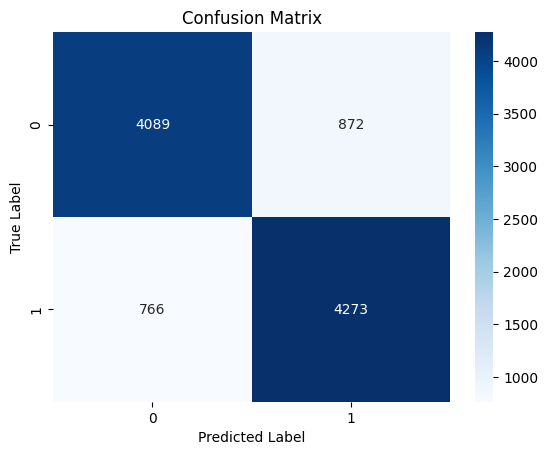

In [ ]:
#CONFUSION MATRIX PLOT FOR NAIVE BAYES MODEL
from sklearn.metrics import  confusion_matrix

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



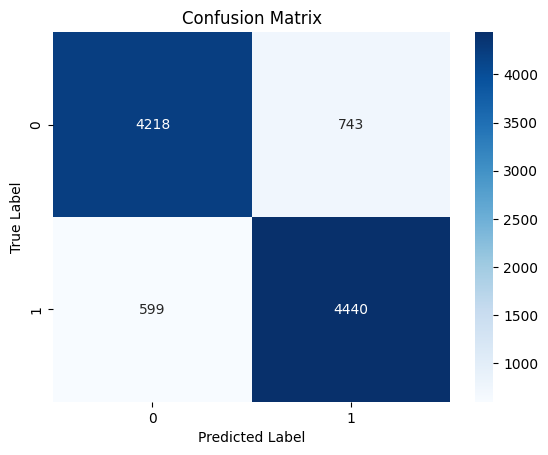

In [ ]:
#CONFUSION MATRIX PLOT FOR LOGISTIC REGRESSION
from sklearn.metrics import  confusion_matrix

# Confusion Matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Linear Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

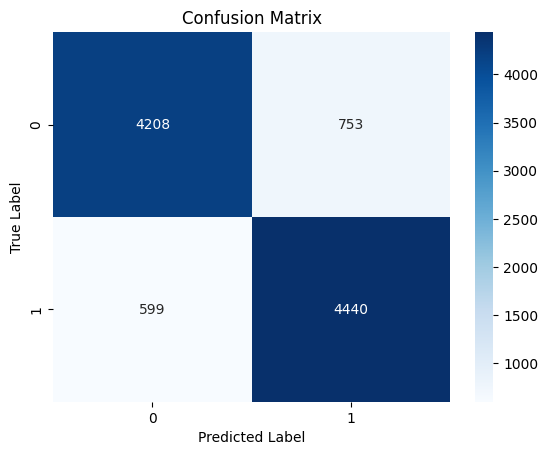

In [ ]:
#CONFUSION MATRIX PLOT FOR SUPPORT VECTOR MACHINES
from sklearn.metrics import  confusion_matrix

# Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

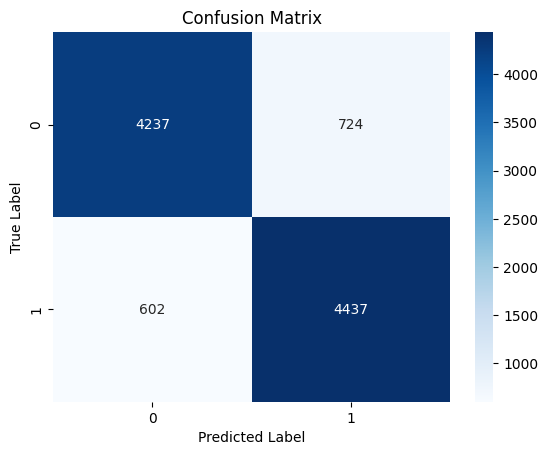

In [ ]:
# CONFUSION MATRIX USING LINEARSVC OF SUPPORT VECTOR MACHINE
from sklearn.metrics import  confusion_matrix

# Confusion Matrix
cm_LSVC = confusion_matrix(y_test, y_pred_LinearSVC)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Linear Support Vector Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

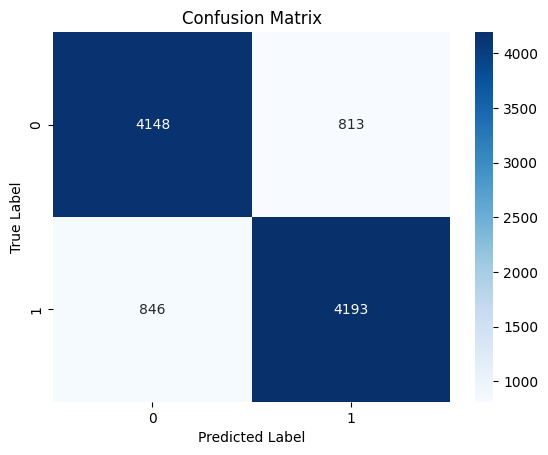

In [ ]:
#CONFUSION MATRIX PLOT FOR RANDOM FOREST MODEL
from sklearn.metrics import  confusion_matrix

# Confusion Matrix
cm_RF = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## USING CONFUSION MATRIX
This script extracts True Positives, True Negatives, False Positives, and False Negatives
from the confusion matrix of various classification models applied to the IMDB sentiment dataset.

### Purpose:
To evaluate the performance of different classification models by extracting key metrics from their confusion matrices.

### Code Breakdown:
1. **Confusion Matrix**: Calculate the confusion matrix for each model.
2. **Metric Extraction**: Create a function to extract TP, TN, FP, and FN from the confusion matrix.
3. **Display Results**: Print the extracted metrics for each model.

### Output:
- The script will display the TP, TN, FP, and FN counts for each model's confusion matrix.

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix

def extract_metrics(cm):
    """
    Extracts True Positives, True Negatives, False Positives, and False Negatives from the confusion matrix.

    Parameters:
    - cm: Confusion matrix as a 2D array

    Returns:
    - A dictionary containing TP, TN, FP, FN
    """
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives

    return {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

# Example usage for each model
# Assuming y_test is the true labels and y_pred_xxx are the predicted labels from different models

# For Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
metrics_nb = extract_metrics(cm_nb)
print("Naive Bayes Metrics:")
print(metrics_nb)

# For Logistic Regression
cm_LR = confusion_matrix(y_test, y_pred_LR)
metrics_LR = extract_metrics(cm_LR)
print("Logistic Regression Metrics:")
print(metrics_LR)

# For Support Vector Machine
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
metrics_SVM = extract_metrics(cm_SVM)
print("Support Vector Machine Metrics:")
print(metrics_SVM)

# For Linear SVC
cm_LinearSVC = confusion_matrix(y_test, y_pred_LinearSVC)
metrics_LinearSVC = extract_metrics(cm_LinearSVC)
print("Linear SVC Metrics:")
print(metrics_LinearSVC)

# For Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
metrics_rf = extract_metrics(cm_rf)
print("Random Forest Metrics:")
print(metrics_rf)


# WORD CLOUD

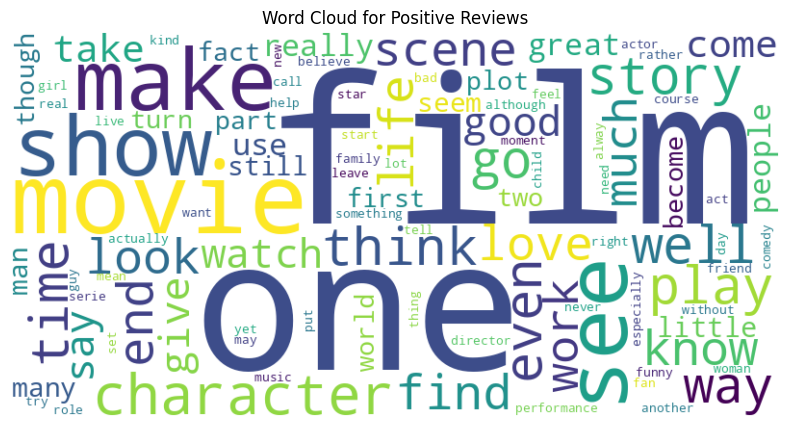

In [ ]:
from wordcloud import WordCloud
"""
Generate a word cloud visualization for positive reviews from the IMDB_movies DataFrame.

This process involves the following steps:
1. Filter the DataFrame to retrieve cleaned reviews labeled as 'positive'.
2. Join the filtered reviews into a single string.
3. Create a word cloud object with specified parameters, including size and background color.
4. Display the word cloud using matplotlib.

The resulting word cloud visually represents the most frequent words in positive reviews,
allowing for an intuitive understanding of user sentiments.
"""

# Word Cloud for Positive Reviews
positive_reviews = ' '.join(IMDB_movies[IMDB_movies['sentiment'] == 'positive']['cleaned_reviews'])
wordcloud_positive = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()




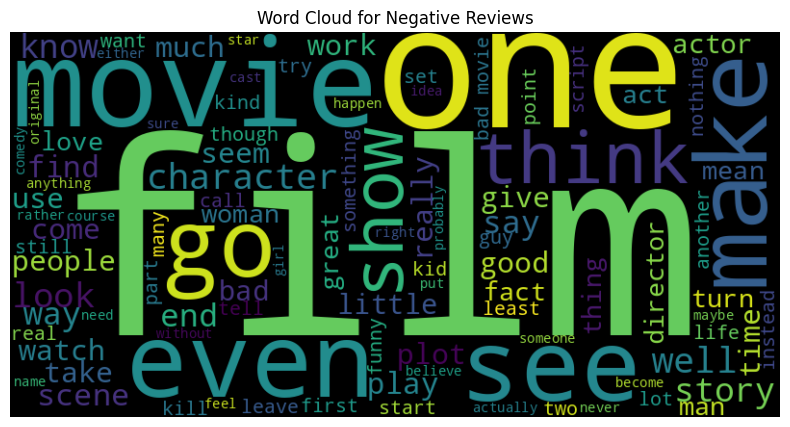

In [ ]:
"""
Generate a word cloud visualization for negative reviews from the IMDB_movies DataFrame.

This process involves the following steps:
1. Filter the DataFrame to retrieve cleaned reviews labeled as 'negative'.
2. Join the filtered reviews into a single string.
3. Create a word cloud object with specified parameters, including size and background color.
4. Display the word cloud using matplotlib.

The resulting word cloud visually represents the most frequent words in negative reviews,
allowing for an intuitive understanding of user sentiments.
"""

# Word Cloud for Negative Reviews
negative_reviews = ' '.join(IMDB_movies[IMDB_movies['sentiment'] == 'negative']['cleaned_reviews'])
wordcloud_negative = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

## OVERALL SUMMARY
Based on the metrics provided:

- Linear SVC performs the best overall in terms of accuracy (0.8674).
- Logistic Regression is slightly lower in accuracy (0.8658) but has the best precision and recall for both classes, which might make it preferable depending on the specific application requirements (especially if false positives or false negatives are costly).
- Random Forest is the least performing model across most metrics, indicating it may not be the best choice for this dataset.

If the goal is to maximize accuracy, Linear SVC is the best model. However, if precision and recall for both classes are crucial, Logistic Regression may be the better option.